In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [41]:
data=pd.read_csv("C:/Users/shrey/Downloads/Assignment/14.Decision Trees/Company_data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [43]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])

In [44]:
# Converting the Sales column into categorical value using mean of the column 7.49
sales_val = []
for value in data["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
data["sales_val"]= sales_val

In [45]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [46]:
X = data.drop(['Sales','sales_val'], axis =1)
Y = data['sales_val'] #Y is our target variable

In [47]:
# Splitting data into training and testing data set # took 20% of data as test and 80% train
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5) #max depth means how many layers in tree we want,here wetook 5
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [49]:
pred = model.predict(x_test)
print('Test data Accuracy is:',np.mean(pred==y_test))
pred1 = model.predict(x_train)
print('Train data Accuracy is:',np.mean(pred1==y_train))

Test data Accuracy is: 0.6625
Train data Accuracy is: 0.821875


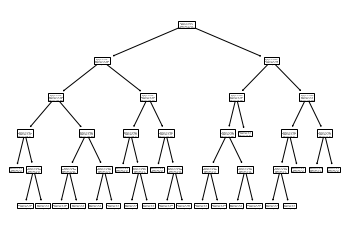

In [50]:
#PLot the decision tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy')

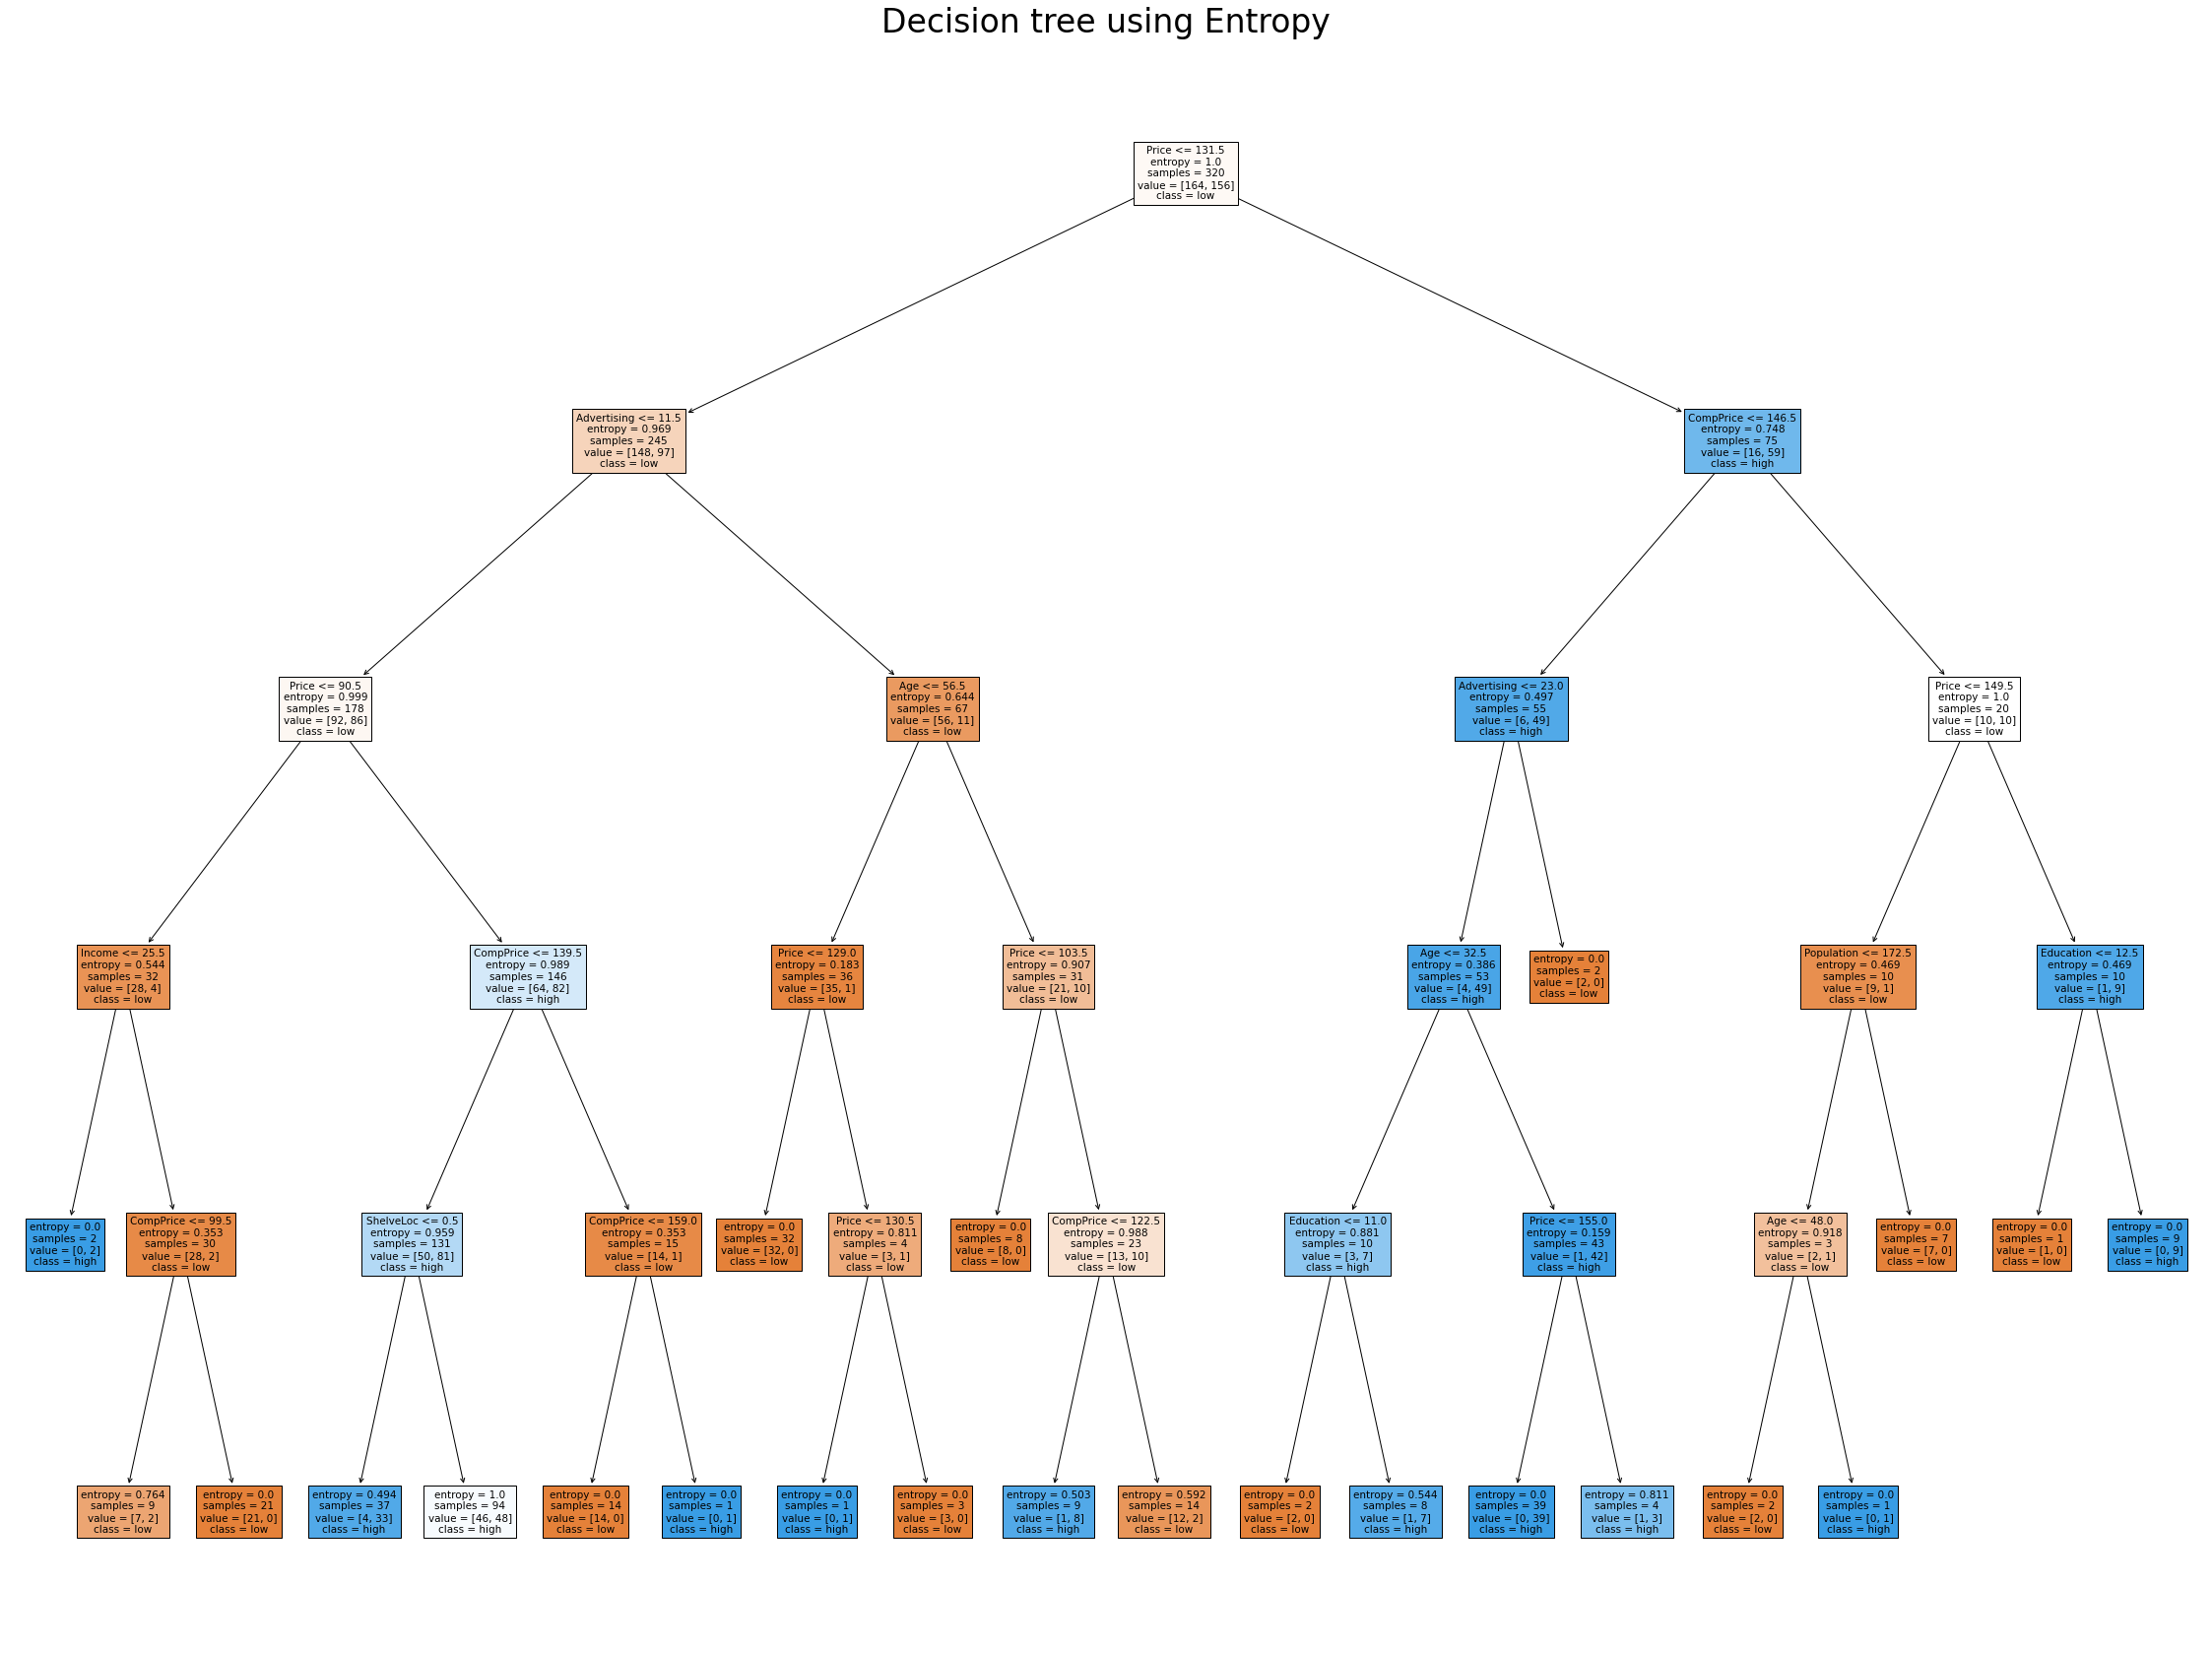

In [51]:
# let's plot the decision tree
fig = plt.figure(figsize=(40,30))
fig = tree.plot_tree(model,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=33)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [52]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [53]:
pred_testg1 = model_gini.predict(x_test)
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.725
Train data Accuracy is: 0.8875


Text(0.5, 1.0, 'Decision tree using Gini')

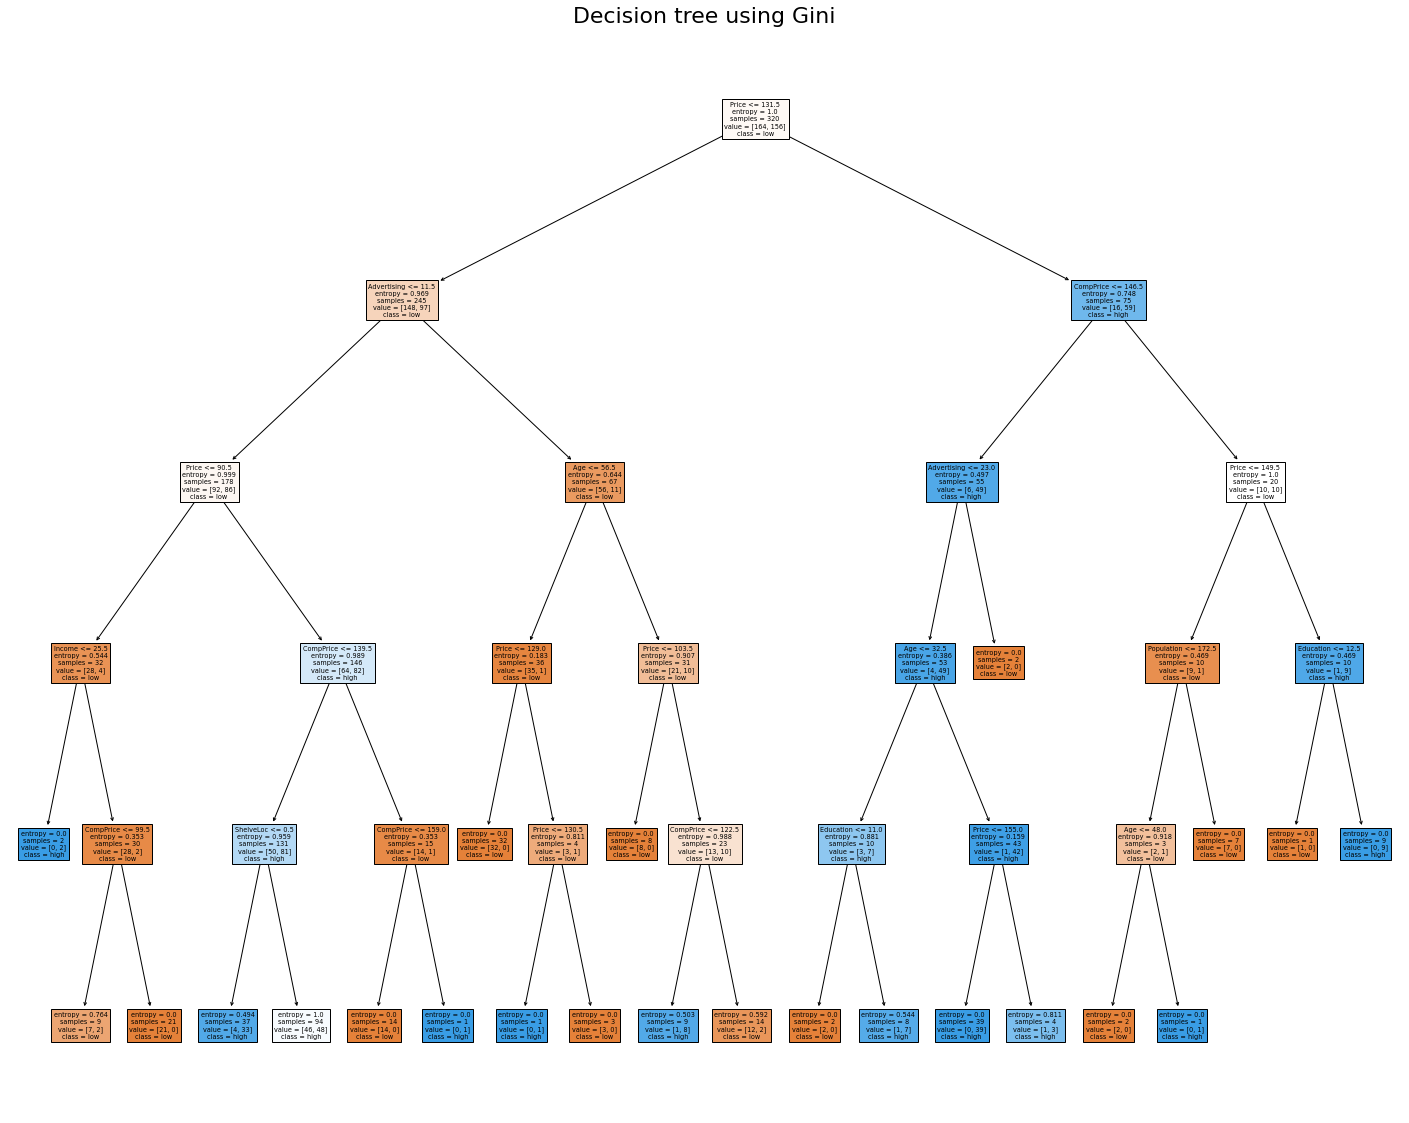

In [54]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

In [55]:
#Both gives us best result at max depth = 5 and three most important features are CompPrice, Price, and Advertising